Initial Data (first 5 rows):
         gene1  gene2  gene3  gene4  gene5  gene6  gene7  gene8  gene9  gene10
sample1     12     21      4    130     18      0     16     54     49       3
sample2      1     44      2     63     11     10     70     32     57       9
sample3      4      4     11    180     21      3     28     34     65       2
sample4      1     10      2    100     44      9     28     16     33       9
sample5      1     11      6    135     16      2     32     29     31       5
Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 2.95 seconds.

Fitting dispersion trend curve...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.06 seconds.

Fitting LFCs...
... done in 0.06 seconds.

Calculating cook's distance...
... done in 0.00 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 0.05 seconds.



Log2 fold change & Wald test p-value: condition Treatment vs Control
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
sample1    15.948319       -0.593868  0.598062 -0.992987  0.320716  0.992720
sample2    20.071993        0.862193  0.635643  1.356412  0.174968  0.878444
sample3    17.982042       -0.403888  0.658829 -0.613038  0.539851  0.992720
sample4    15.513719        0.152065  0.623002  0.244084  0.807166  0.992720
sample5    13.329567       -0.154633  0.576663 -0.268152  0.788582  0.992720
...              ...             ...       ...       ...       ...       ...
sample96   15.487539        0.260864  0.589902  0.442216  0.658333  0.992720
sample97   12.889048       -0.036935  0.569008 -0.064911  0.948245  0.992720
sample98   16.679672       -0.037144  0.633230 -0.058658  0.953225  0.992720
sample99   24.093650       -0.016231  0.600110 -0.027047  0.978422  0.992720
sample100  20.405656        0.374718  0.674120  0.555863  0.578305  0.992720

[100 r

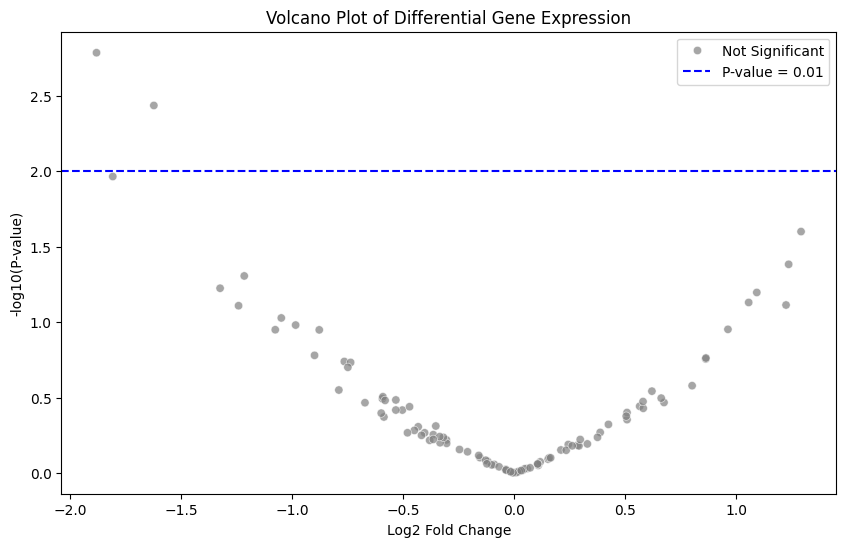

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydeseq2.utils import load_example_data
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import warnings
warnings.filterwarnings('ignore')

counts_df = load_example_data()
conditions = ['Control'] * (counts_df.shape[1] // 2) + ['Treatment'] * (counts_df.shape[1] // 2)
metadata_df = pd.DataFrame({'condition': conditions}, index=counts_df.columns)

print("Initial Data (first 5 rows):")
print(counts_df.head())

counts_t = counts_df.T  

dds = DeseqDataSet(counts=counts_t, metadata=metadata_df, design_factors="condition")
dds.deseq2()

stat_res = DeseqStats(dds, contrast=("condition", "Treatment", "Control"))
stat_res.summary()
results_df = stat_res.results_df

print("\nDifferential Expression Results (first 10 rows):")
print(results_df.head(10))

pval_threshold = 0.01
results_df['regulation'] = 'Not Significant'
results_df.loc[(results_df['padj'] < pval_threshold) & (results_df['log2FoldChange'] > 0), 'regulation'] = 'Upregulated'
results_df.loc[(results_df['padj'] < pval_threshold) & (results_df['log2FoldChange'] < 0), 'regulation'] = 'Downregulated'

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=results_df,
    x="log2FoldChange",
    y=-np.log10(results_df["pvalue"]),
    hue="regulation",
    palette={"Upregulated": "green", "Downregulated": "red", "Not Significant": "grey"},
    alpha=0.7
)
plt.axhline(y=-np.log10(pval_threshold), color="blue", linestyle="--", label=f"P-value = {pval_threshold}")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10(P-value)")
plt.title("Volcano Plot of Differential Gene Expression")
plt.legend()
plt.show()


In [2]:
!pip install pydeseq2

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 815.8 kB/s eta 0:00:03
   ----------- ---------------------------- 0.8/2.9 MB 871.8 kB/s eta 0:00:03
   -------------- ------------------------- 1.0/2.9 MB 958.7 kB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.9 MB 1.0 MB/s eta 0:00:02
   ------------------------- -------------- 1.8/2.9 MB 1.2 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.9 MB 1.2 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.9 MB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 2.6/2.9 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 1.2 MB/s eta 0:00:00
   -------------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
